In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/horse-or-human.zip'


In [ ]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip'

In [ ]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import shutil

# Interactive widgets
from ipywidgets import widgets

In [ ]:
original_horses_dir = '/content/horses'
original_humans_dir = '/content/humans'
new_base_train_dir = 'horses_and_humans'
new_base_validation_dir = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)'

os.makedirs(new_base_train_dir, exist_ok=True)

# copied to new training directory
shutil.copytree(original_horses_dir, os.path.join(new_base_train_dir, 'horses'))
shutil.copytree(original_humans_dir, os.path.join(new_base_train_dir, 'humans'))

# copied to new validation directory


print(f'succesfully copied the files to the new {new_base_train_dir} directory')

succesfully copied the files to the new horses_and_humans directory


In [ ]:
train_dir = os.listdir(new_base_train_dir)
print(f'training subdirectories are: {train_dir}')

validation_dir = os.listdir(new_base_validation_dir)
print(f'validation subdirectories are: {validation_dir}')

training subdirectories are: ['horses', 'humans']
validation subdirectories are: ['horses', 'humans']


In [ ]:

# Directory with training horse pictures
train_horse_dir = '/content/horses_and_humans/horses'
# Directory with training human pictures
train_human_dir = '/content/horses_and_humans/humans'

# Directory with validation horse pictures
validation_horse_dir = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)/horses'
# Directory with validation human pictures
validation_human_dir = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)/humans'

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse01-2.png', 'horse5-303.png', 'horse46-1.png', 'horse16-2.png', 'horse38-6.png', 'horse2-294.png', 'horse4-541.png', 'horse34-7.png', 'horse5-478.png', 'horse40-7.png']
TRAIN SET HUMANS: ['valhuman05-24.png', 'valhuman02-17.png', 'human06-05.png', 'human13-22.png', 'human01-02.png', 'human04-29.png', 'human11-14.png', 'human03-08.png', 'human15-11.png', 'human03-17.png']
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [ ]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 628
total training human images: 655
total validation horse images: 128
total validation human images: 128


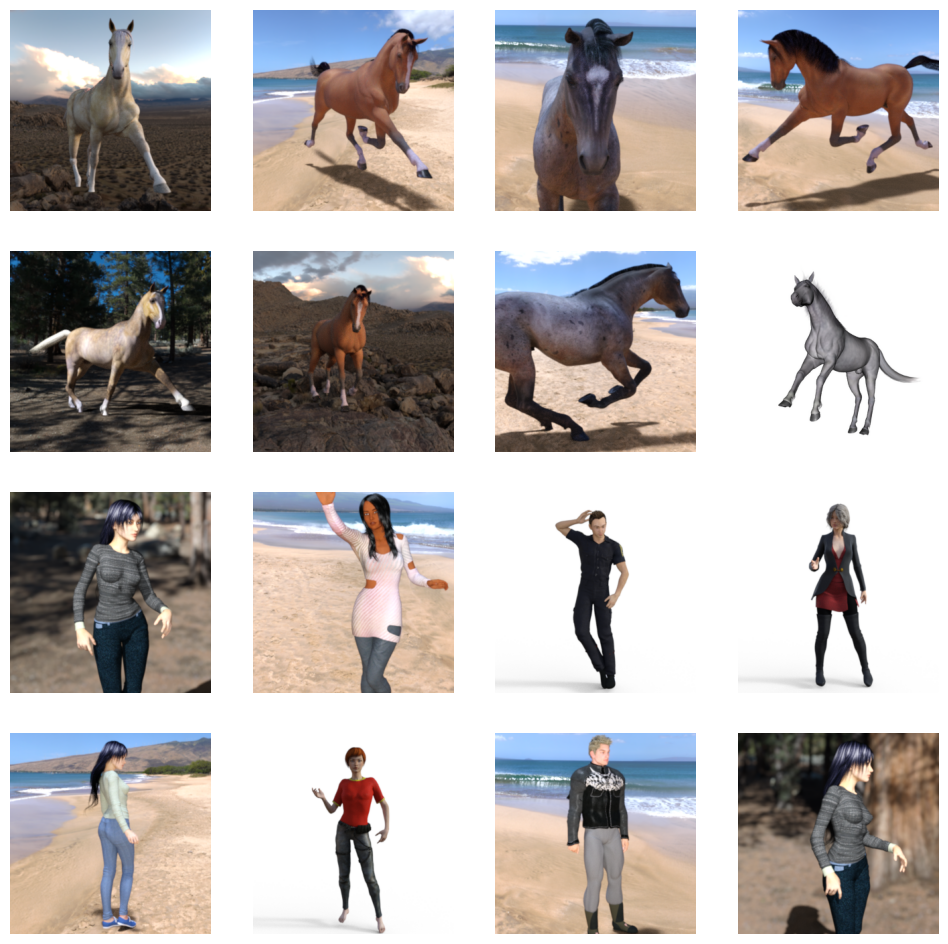

In [ ]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.Input(shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0 to 1 where 0 is for 'horses' and 1 for 'humans'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    new_base_train_dir,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
    )

# Instantiate the validation set
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    new_base_validation_dir,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
    )

Found 1283 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [ ]:
# Define the rescaling layer
rescale_layer = tf.keras.layers.Rescaling(1./255)

# Rescale both datasets
train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

In [ ]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

# Configure the validation dataset
validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

In [ ]:
history = model.fit(
      train_dataset_final,
      epochs=15,
      validation_data = validation_dataset_final,
      verbose=2)

Epoch 1/15
41/41 - 141s - 3s/step - accuracy: 0.6913 - loss: 0.6335 - val_accuracy: 0.9102 - val_loss: 0.4364
Epoch 2/15
41/41 - 129s - 3s/step - accuracy: 0.9041 - loss: 0.3635 - val_accuracy: 0.9258 - val_loss: 0.2088
Epoch 3/15
41/41 - 131s - 3s/step - accuracy: 0.9197 - loss: 0.2169 - val_accuracy: 0.8945 - val_loss: 0.3214
Epoch 4/15
41/41 - 126s - 3s/step - accuracy: 0.9439 - loss: 0.1685 - val_accuracy: 0.9336 - val_loss: 0.1742
Epoch 5/15
41/41 - 143s - 3s/step - accuracy: 0.9571 - loss: 0.1475 - val_accuracy: 0.9180 - val_loss: 0.2416
Epoch 6/15
41/41 - 150s - 4s/step - accuracy: 0.9618 - loss: 0.1191 - val_accuracy: 0.9453 - val_loss: 0.1467
Epoch 7/15
41/41 - 127s - 3s/step - accuracy: 0.9680 - loss: 0.0994 - val_accuracy: 0.9531 - val_loss: 0.1219
Epoch 8/15
41/41 - 128s - 3s/step - accuracy: 0.9766 - loss: 0.0818 - val_accuracy: 0.9688 - val_loss: 0.1109
Epoch 9/15
41/41 - 131s - 3s/step - accuracy: 0.9797 - loss: 0.0733 - val_accuracy: 0.9531 - val_loss: 0.1234
Epoch 10/1

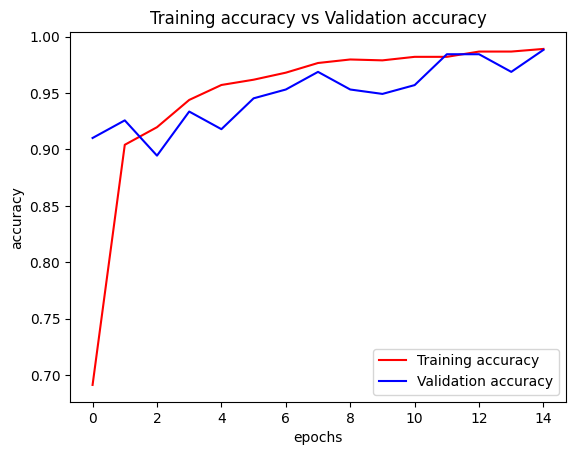

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    # In newer ipywidgets versions, change.new contains a dictionary where keys are filenames
    # and values are dictionaries containing 'metadata' and 'content'.
    # The 'content' is already a bytes object.
    for filename, file_info in change.new.items():
        file_content = file_info['content']
        file_jpgdata = BytesIO(file_content)
        file_predict(filename, file_jpgdata, out)


# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 300, 300, 3))
  warnings.warn(msg)
/tmp/ipython-input-20-1170845695.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipython-input-20-1170845695.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


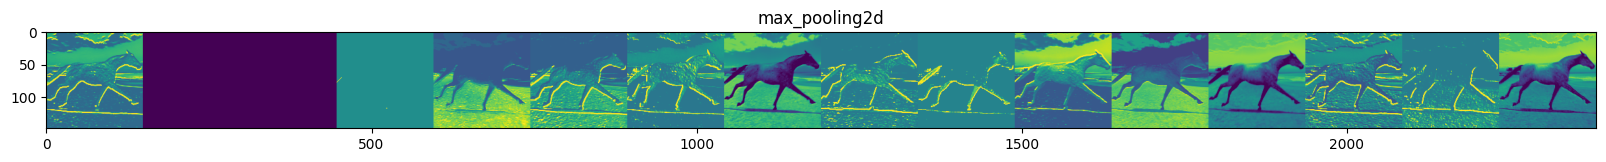

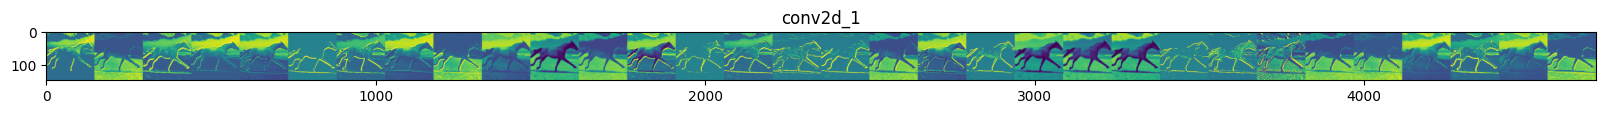

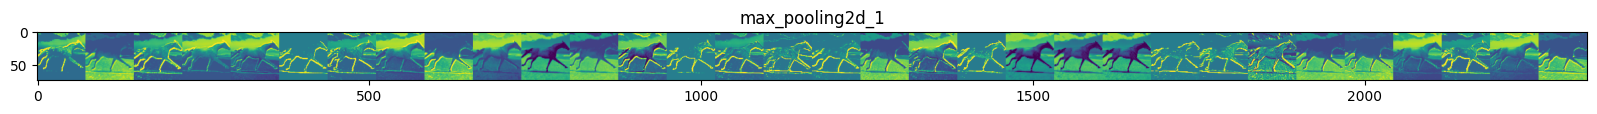

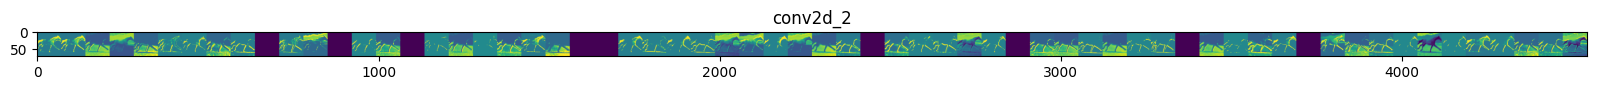

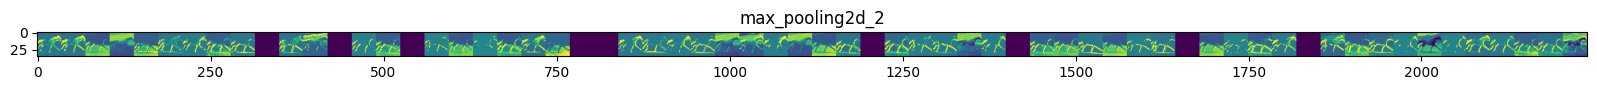

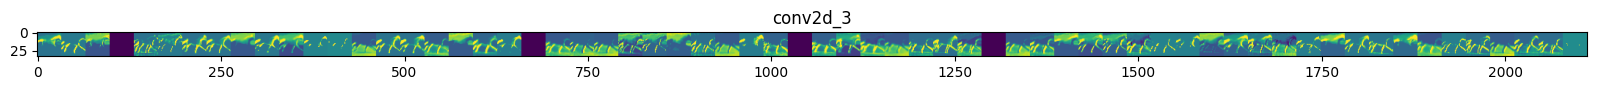

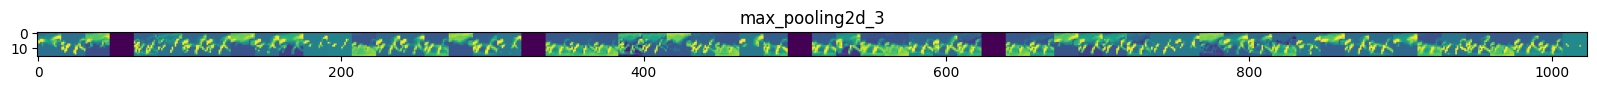

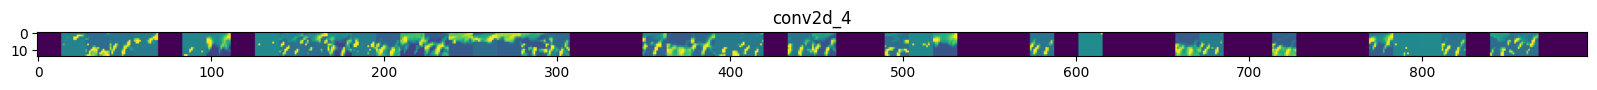

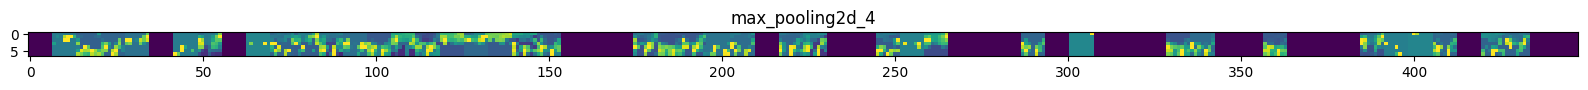

In [ ]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')